# Ensemble Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap1 = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
def plot_decision_map(x, model, ax, **kwargs):
    x1min, x2min = x.min(axis=0)
    x1max, x2max = x.max(axis=0)
    X1map, X2map = np.mgrid[x1min:x1max:0.05, x2min:x2max:0.05]
    ypreds = model.predict(np.c_[X1map.reshape(-1, 1), X2map.reshape(-1, 1)])
    ypreds = ypreds.reshape(X1map.shape)
    ax.contourf(X1map, X2map, ypreds, **kwargs)
    ax.set_xlim(x1min, x1max)
    ax.set_ylim(x2min, x2max)

## Voting Classifiers
Train various classifiers, then vote on the prediction:
* **Hard Voting**: Take the mode of the predicted classes 
* **Soft Voting**: Take the class with the highest probability, averaged over every classifier.

We train every classifier under the same training set.

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(500, noise=0.3, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
# Hard Voting Classifier: For a given training instance, take the
# mode of all predicted classes.

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ("lr", log_clf),
        ("rf", rnd_clf),
        ("svc", svm_clf)
    ],
    voting="hard"
)

voting_clf.fit(xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [5]:
print("..Hard Voting Classifier Results..")
from sklearn.metrics import accuracy_score
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    clf_name = clf.__class__.__name__
    print(f"{clf_name:>22}: {accuracy_score(ytest, ypred):0.3%}")

..Hard Voting Classifier Results..
    LogisticRegression: 86.400%
RandomForestClassifier: 87.200%
                   SVC: 88.800%
      VotingClassifier: 89.600%


/Users/gerardoduran/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Note:** In this example, that the `VotingClassifier` surpassed all other classifiers is mereley probabilisitic. Modifying how the data is split, or the how the data is generated yield to a lower `VotingClassifier` accuracy

In [6]:
# Soft Voting Classifier: Predict the class with the highest probability,
# averaged over all individual classifiers

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(
    estimators=[
        ("lr", log_clf),
        ("rf", rnd_clf),
        ("svc", svm_clf)
    ],
    voting="soft"
)

voting_clf.fit(xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [7]:
print("..Soft Classifier Results..")
from sklearn.metrics import accuracy_score
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    clf_name = clf.__class__.__name__
    print(f"{clf_name:>22}: {accuracy_score(ytest, ypred):0.3%}")

..Soft Classifier Results..
    LogisticRegression: 86.400%
RandomForestClassifier: 87.200%
                   SVC: 88.800%
      VotingClassifier: 91.200%


/Users/gerardoduran/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging and Pasting

> Use the same training algorithm for every predictor, but train them on different subsets of the training set

* When sampling with replacement: **bagging**
* When sampling without replacement: **Pasting**

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), # The model to fit
    n_estimators=500, # The number of trees to work with
    max_samples=100, # Number of training instances for each tree
    bootstrap=True, # Set bagging to True; else pasting
    n_jobs=-1 # Number of CPUs to train the model
)

bag_clf.fit(xtrain, ytrain)
ypred = bag_clf.predict(xtest)
accuracy_score(ytest, ypred)

0.92

### Comparing Classifiers: Decision Tree with Bagging v.s. a Single Decision Tree

In [9]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(xtrain, ytrain)
print(f"Number of nodes: {tree_clf.tree_.node_count}")

Number of nodes: 85


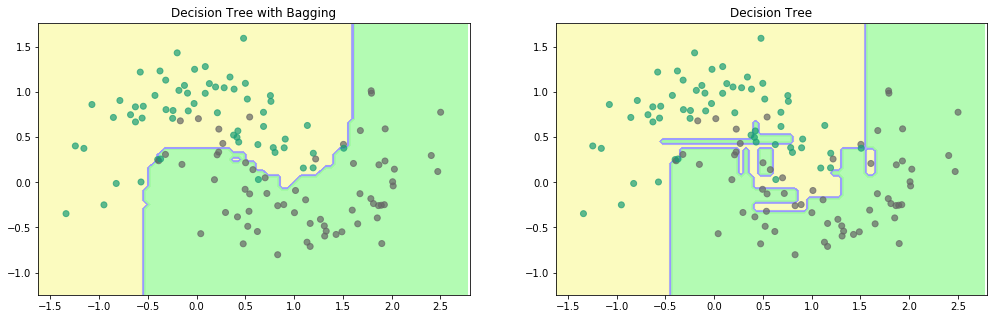

In [10]:
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plot_decision_map(xtrain, bag_clf, ax1, alpha=0.8, cmap=custom_cmap1)
plot_decision_map(xtrain, tree_clf, ax2, alpha=0.8, cmap=custom_cmap1)
ax1.set_title("Decision Tree with Bagging")
ax2.set_title("Decision Tree")
for ax in (ax1, ax2):
    ax.scatter(*xtest.T, c=ytest, cmap=plt.cm.Dark2, alpha=0.7)

## Out-of-Bag (OOB) Evaluation

When bootstraping, around 63% of the data gets evaluated, the remaining 37% result as unobserved variables. In scikit-learn we can make use of the 37% to evaluate as a cross-validation set in what is called an OOB evaluation.

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=314), # the model to perform bootstrap
    n_estimators=500,                         # number of trees to consider
    bootstrap=True,                           # resample with replacement 
    n_jobs=-1,                                # use all available CPUs
    oob_score=True,                           # Out of Bag evaluation score
    random_state=314
)

bag_clf.fit(xtrain, ytrain)
bag_clf.oob_score_

0.8986666666666666

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(bag_clf.predict(xtest), ytest)

0.904

## Random Forests
**An ensemble of decision trees** generally trained via the *bagging* method and `max_samples` set to the training dataset. For each tree in the forest, instead of searching for the best feature when splitting a node, it searches for the best split among a random subset of the features.

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
forest_clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Feature Importance (On decision trees and random forests)
> It is possible to get an estimate of a feature's imporance by computing the average depth at which it appears across all trees in the forest. 

In [14]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
forest_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
forest_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], forest_clf.feature_importances_):
    print(f"{name:>17}: {score:>9.4%}")

sepal length (cm):  10.3929%
 sepal width (cm):   2.3996%
petal length (cm):  43.5641%
 petal width (cm):  43.6434%


In [15]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

forest_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

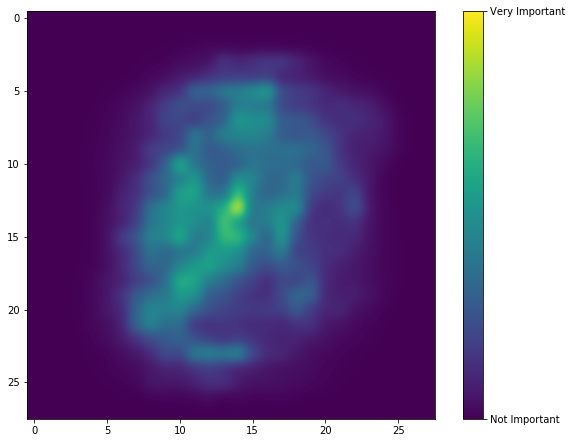

In [16]:
min_importance = forest_clf.feature_importances_.min()
max_importance = forest_clf.feature_importances_.max()

forest_feats = forest_clf.feature_importances_.reshape(28, 28)
plt.figure(figsize=(10,7.5))
plt.imshow(forest_feats, interpolation="gaussian")
cbar = plt.colorbar(ticks=[min_importance, max_importance])
cbar.ax.set_yticklabels(["Not Important", "Very Important"]);

## AdaBoost
* Combine several weak learners into a strong learner.
* Train predictors sequentially, each one trying to correct its predecesor

How to correct a predecesor? Pay a bit more attention to the training instances that the predecessor underfitted: **AdaBoost**

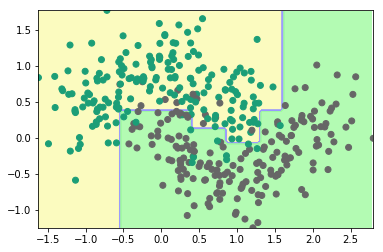

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME",
    learning_rate=0.5
)


ada_clf.fit(xtrain, ytrain)

# Plotting Decision Function
fig = plt.figure()
ax = fig.add_subplot(111)
plot_decision_map(xtrain, ada_clf, ax, cmap=custom_cmap1, alpha=0.8)
plt.scatter(*xtrain.T, c=ytrain, cmap=plt.cm.Dark2)

### Learning with AdaBoost
We consider three classifiers $\{\hat y_1, \hat y_2, \hat y_3\}$ and the target output $y$

For each instance $y^{(i)}$ in the training set, we asign an initial weight $w^{(i)}$, which will be updated as we add models to the ensemble.

After training a model $\hat y_j$ over $\{y^{(i)}\}_{i=1}^n$, compute the **weighted error rate of the $j$-th predictor**:
$$
    r_j = \sum_{\{i \ | \ y_j^{(i)} \neq y^{(i)} \}} w^{(i)}
$$

We proceed by computing the **predictor weight** of the $j$-th classifier as
$$
    \alpha_j = \eta \log \frac{1 - r_j}{r_j}
$$

Note that, as $r_j$ increases (more errors), $\alpha_j$ decreases

Once computed $\alpha_j$, we update each $\{w^{(i)}\}_{i=1}^m$

$$
w^{(i)} = \begin{cases}
   w^{(i)} & y_j^{(i)} = y^{(i)} \\
   w^{(i)} e^{\alpha_j} & y_j^{(i)} \neq y^{(i)}
\end{cases}
$$


In [18]:
import pandas as pd


y = np.array([1, 1, 0, 1, 0, 1, 0, 0, 1])
y1 = np.array([1, 1, 0, 0, 1, 0, 1, 1, 0])
y2 = np.array([0, 0, 1, 1, 0, 1, 1, 1, 0])
y3 = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1])
dset = pd.DataFrame({  "y":  y, "hy1":y1,
                     "hy2": y2, "hy3":y3})

dset = dset[["y", "hy1", "hy2", "hy3"]]
weights = {"i0": np.array([1/9] * len(y))}

In [19]:
dset

,y,hy1,hy2,hy3
0,1,1,0,0
1,1,1,0,0
2,0,0,1,1
3,1,0,1,0
4,0,1,0,1
5,1,0,1,0
6,0,1,1,0
7,0,1,1,0
8,1,0,0,1


In [20]:
r1 = weights["i0"][dset["y"] != dset["hy1"]].sum()
alpha1 = np.log((1 - r1) / r1)

weights["i1"] = weights["i0"]
weights["i1"][np.where(dset["y"] != dset["hy1"])] *= np.exp(alpha1)
weights["i1"] /= weights["i1"].sum()

In [21]:
alpha1

-0.6931471805599456

In [22]:
## Computing the prediction considering the first model
weights["i1"]

array([0.16666667, 0.16666667, 0.16666667, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333])

In [23]:
## Updating weights: considering the second model
r2 = weights["i1"][dset["y"] != dset["hy2"]].sum()
alpha2 = np.log((1 - r2) / r2)

weights["i2"] = weights["i1"]
weights["i2"][np.where(dset["y"] != dset["hy2"])] *= np.exp(alpha2)
weights["i2"] /= weights["i2"].sum()

In [24]:
# Computing predictions considering the first and second model 
weights["i2"]

array([0.11111111, 0.11111111, 0.11111111, 0.16666667, 0.16666667,
       0.16666667, 0.05555556, 0.05555556, 0.05555556])

In [25]:
alpha1, alpha2

(-0.6931471805599456, -1.0986122886681087)

In [26]:
## Updating weights: considering the third model
r3 = weights["i2"][dset["y"] != dset["hy3"]].sum()
alpha3 = np.log((1 - r3) / r3)

weights["i3"] = weights["i2"]
weights["i3"][np.where(dset["y"] != dset["hy2"])] *= np.exp(alpha3)
weights["i3"] /= weights["i3"].sum()

In [27]:
alpha1, alpha2, alpha3

(-0.6931471805599456, -1.0986122886681087, -1.6094379124340992)

In [28]:
# Computing predictions considering the first, second and third
weights["i3"]

array([0.03703704, 0.03703704, 0.03703704, 0.27777778, 0.27777778,
       0.27777778, 0.01851852, 0.01851852, 0.01851852])

## Gradient Boost
* Combine several weak learners into a strong learner.
* Train predictors sequentially, each one trying to correct its predecesor

**How to correct a predecesor?** Fit the new predictor to the *residual errors* made by the previous predictor.

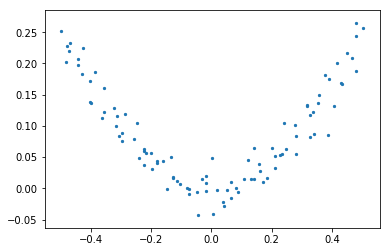

In [42]:
from numpy.random import randn, seed
from sklearn.tree import DecisionTreeRegressor

seed(314)
nsamples = 100
x = np.linspace(-0.5, 0.5, nsamples) + randn(nsamples) * 0.01
y = x ** 2 + randn(nsamples) * 0.02
x = x.reshape(-1, 1)

plt.scatter(x, y, s=5)

In [56]:
# Fitting the decision trees. Each decision tree is fitted with the residuals
# of its previous model. The final decision is made by summing the predictions
# of each tree

reg1 = DecisionTreeRegressor(max_depth=2)
reg1.fit(x, y)

yres1 = y - reg1.predict(x)
reg2 = DecisionTreeRegressor(max_depth=2)
reg2.fit(x, yres1)

yres2 = yres1 - reg2.predict(x)
reg3 = DecisionTreeRegressor(max_depth=2)
reg3.fit(x, yres2);

yres3 = yres2 - reg3.predict(x)
reg4 = DecisionTreeRegressor(max_depth=2)
reg4.fit(x, yres3);

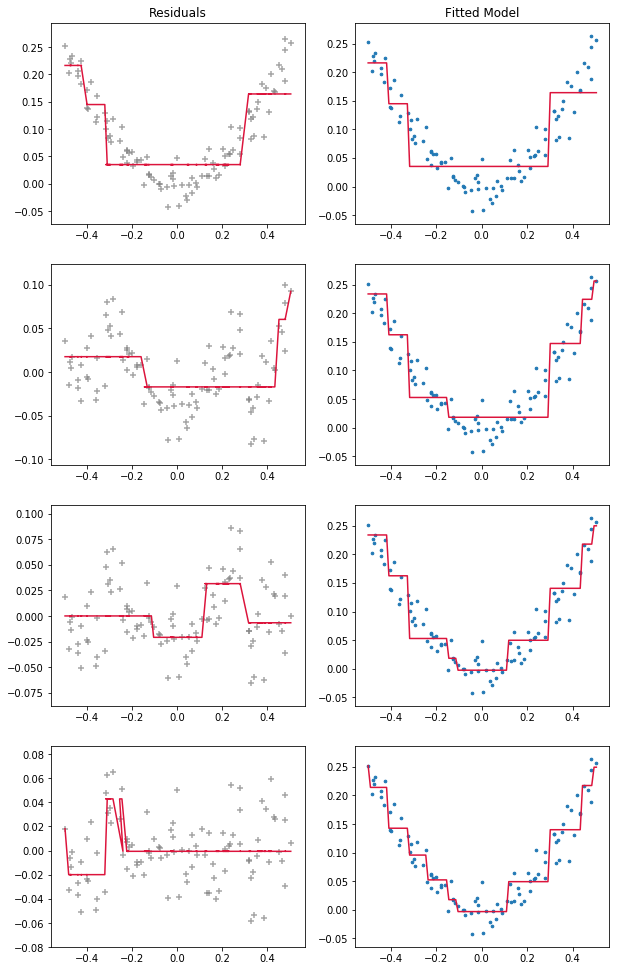

In [64]:
from math import ceil
trees = [reg1, reg2, reg3, reg4]
residuals = [y, yres1, yres2, yres3]
xrange = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
fig = plt.figure(figsize=(10, 17))
for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    nmodel = ceil(i / 2)
    if i == 1:
        ax.set_title("Residuals")
    if i == 2:
        ax.set_title("Fitted Model")
    if i % 2 != 0:
        ax.scatter(x, residuals[nmodel-1], s=30, color="tab:gray", marker="+", alpha=0.7)
        ax.plot(x, trees[nmodel-1].predict(x), color="crimson")
    else:
        y_pred = sum(tree.predict(xrange) for tree in trees[:nmodel])
        ax.scatter(x, y, s=7)
        ax.plot(xrange, y_pred, color="crimson")
        

#### Gradient Boost in scikitlearn

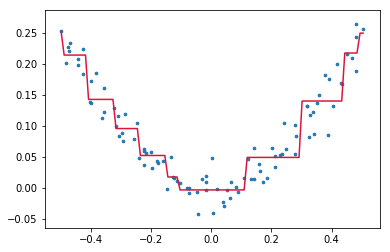

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=4, learning_rate=1)
gbrt.fit(x, y)
plt.scatter(x, y, s=7)
plt.plot(xrange, gbrt.predict(xrange), color="crimson")

### Early Stopping
CV method used to find the optimal number of models inside a gradient boosting ensemble.

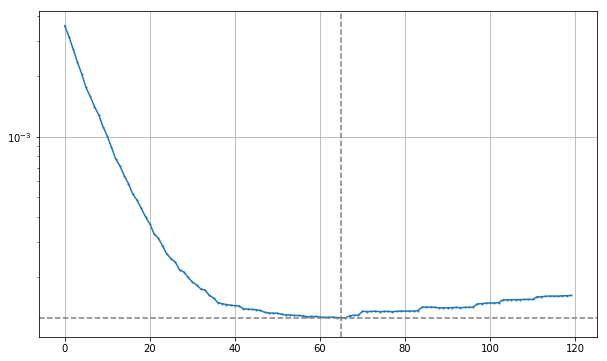

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

plt.figure(figsize=(10,6))
x_train, x_cv, y_train, y_cv = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=3141)
n_trees = 120
# Gradient Boosted Regression Tree.
# Recall: max_depth => Number of slices; nestimators => number of trees
gbrt = GradientBoostingRegressor(max_depth=2, # Number number of slices
                                 n_estimators=n_trees # Number of trees
                                )
gbrt.fit(x_train, y_train)
errors = [mean_squared_error(y_cv, y_pred) for y_pred in
          gbrt.staged_predict(x_cv)]
best_reg_ix = np.argmin(errors)

plt.plot(errors)
plt.scatter(range(n_trees), errors, s=1)
plt.yscale("log")
plt.axhline(errors[best_reg_ix], linestyle="--", color="tab:gray")
plt.axvline(x = best_reg_ix, linestyle="--", color="tab:gray")
plt.grid()

## Exercises

**1. If you have trained five different models on the exact same training data, and the all achieve 95% precision, is there any chance that you can combine these models to get better results? If so, how so? If not, why?**  
No, in order to improve a set of models' performance with an ensemble, every model in the ensemble must be trained using a random subset of the data.

**2. What is the difference between hard and soft voting classifiers?**  
In order to make a prediction, a hard-voting classifier consdiers the *mode* of the predictions made by the classifiers in the enseble; on the other hand, soft-voting classifier considers the average probability of a class, for every class, and predicts the class with highest average probability.

**3. Is it possible to speed up training of a bagging ensemble by distributing it accross multiple servers? What about pasting ensembles, boosting ensembles, random forests, or stacking ensembles?**

* Bagging, yes, since we consider a set of models trained on a random subsample (with replacement) of the training set, it is possible to train each model in the bagging ensemble before making a prediction.

* Pasting, yes, similarly with bagging, we consider a random subsample (wihout replacement) of the training set to train each model in the ensemble, before making a final prediction, therefore it is possible to distribute this computation accross multiple CPUs

* Boosting, no. The main idea in boosting is to make an ensemble where, for each model in the ensemble, its purpose is to correct the erros made by the previous model, e.g., in order to train model #3 in the ensemble, it is necesary first to fit models #1 and #2.

* Random Forests, yes, random forests is a kind of bagging with decision trees, albeit with the additional requirements that the number of training instances is the number of units in the training set and, for each tree in the forest, we consider only a subset of the features to make the split. 

* Stacking, partially. The first layer in a stacking ensemble can be computed in paraller, on the other hand, the subsequent layers in the ensemble require predictions from the layers before.

**4. What is the benefit of out-of-bag evaluation?**

Since not every single training example is considered in bagging, out-of-bag evaluation is helpful in the assesment of a model's performance on generalization. And an alternative to implement LOOCV or K-fold cv methods.

**5. What makes Extra-Trees more random than regular Random Forests? How can this extra randomness help? Are Extra-Trees slower or faster than regular random forests?**

While Random Forest find the best split among a subset of features, Extra Trees chose random thresholds for splitting each feature.

**6. If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how?**  
* Choose a higher learning rate $\eta$
* Choose models with higher capacity into the ensemble.

**7. If your Gradient Boosting overfits the training set, should you increase or decrease the learning rate?**  
Decrease the learning rate, since increasing it raises its capacity.

**8. Load the MNIST data (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use the first 40,000 instances for training, the next 10,000 for validation, and the last 10,000 for testing). Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM. Next, try to combine them into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier. Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?**

In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

mnist = fetch_mldata("MNIST original")
x_train, x_test = mnist["data"][:40_000], mnist["data"][40_000:]
y_train, y_test = mnist["data"][:40_000], mnist["data"][40_000:]

In [ ]:
rf_clf = RandomForestClassifier(n_jobs=-1, verbose=3)
et_clf = ExtraTreesClassifier(n_jobs=-1)
svm_vlf = SVC()

rf_clf.fit(x_train, y_train,)

building tree 1 of 10building tree 2 of 10building tree 3 of 10
building tree 4 of 10
building tree 5 of 10building tree 6 of 10


building tree 7 of 10
building tree 8 of 10



In [ ]:
print("Done")